## CODE SOLUTION  : PATEL CHINTAN
  

## IMPORTING NECCESSORY LIBRARY

In [1]:
#Library for data visualization and extraction and editing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

#Libarary for statistic evaluation


#Library for model devlopment


#Libray for feature engineering 

#### Loading the data and other imports

In [2]:
url_data = 'C:\\DATA SCIENCE STUDY DRIVE\\UDEMY PYTHON FOR DATA SCIENCE\\CHIINTAN PRACTICE FILE WITH RESORCE\\CHINTAN MAJOR PROJECT ANN\\DATA SOURCE\\'
file_name = 'LEADING_CLUB_LOAN_DATA.csv'
data = pd.read_csv(url_data+file_name)

In [3]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [5]:
#extracting catogorical features to study based on number of unique values are more than 25 or not
#Looking into description of countineous number variables
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [6]:
catagorical_features = data[data.columns[data.dtypes == object]]

In [7]:
catagorical_features.describe().transpose()

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [8]:
#Once features understood than next stepp is to look into each features and Performing EDA for each features and labes
raw_data = data.copy()

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

In [9]:
# CODE HERE

Text(0, 0.5, 'NO OF RECORDS')

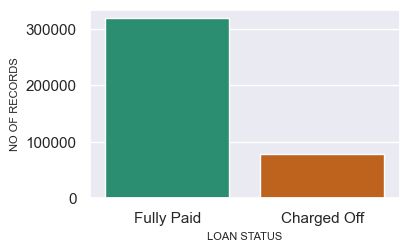

In [10]:
sns.set_theme(style='darkgrid',palette="Dark2")

plt.figure(figsize = (4,2.5) , dpi = 100)
sns.countplot(x = "loan_status" , data = raw_data)
plt.xlabel("LOAN STATUS",fontsize = 8)
plt.ylabel("NO OF RECORDS",fontsize = 8)
#based on this it can be seen that dataset is not balanced much. Catogories indicating fully paid loan is much higher than others

**TASK: Create a histogram of the loan_amnt column.**

In [11]:
# CODE HERE

Text(0, 0.5, 'NO OF RECORDS')

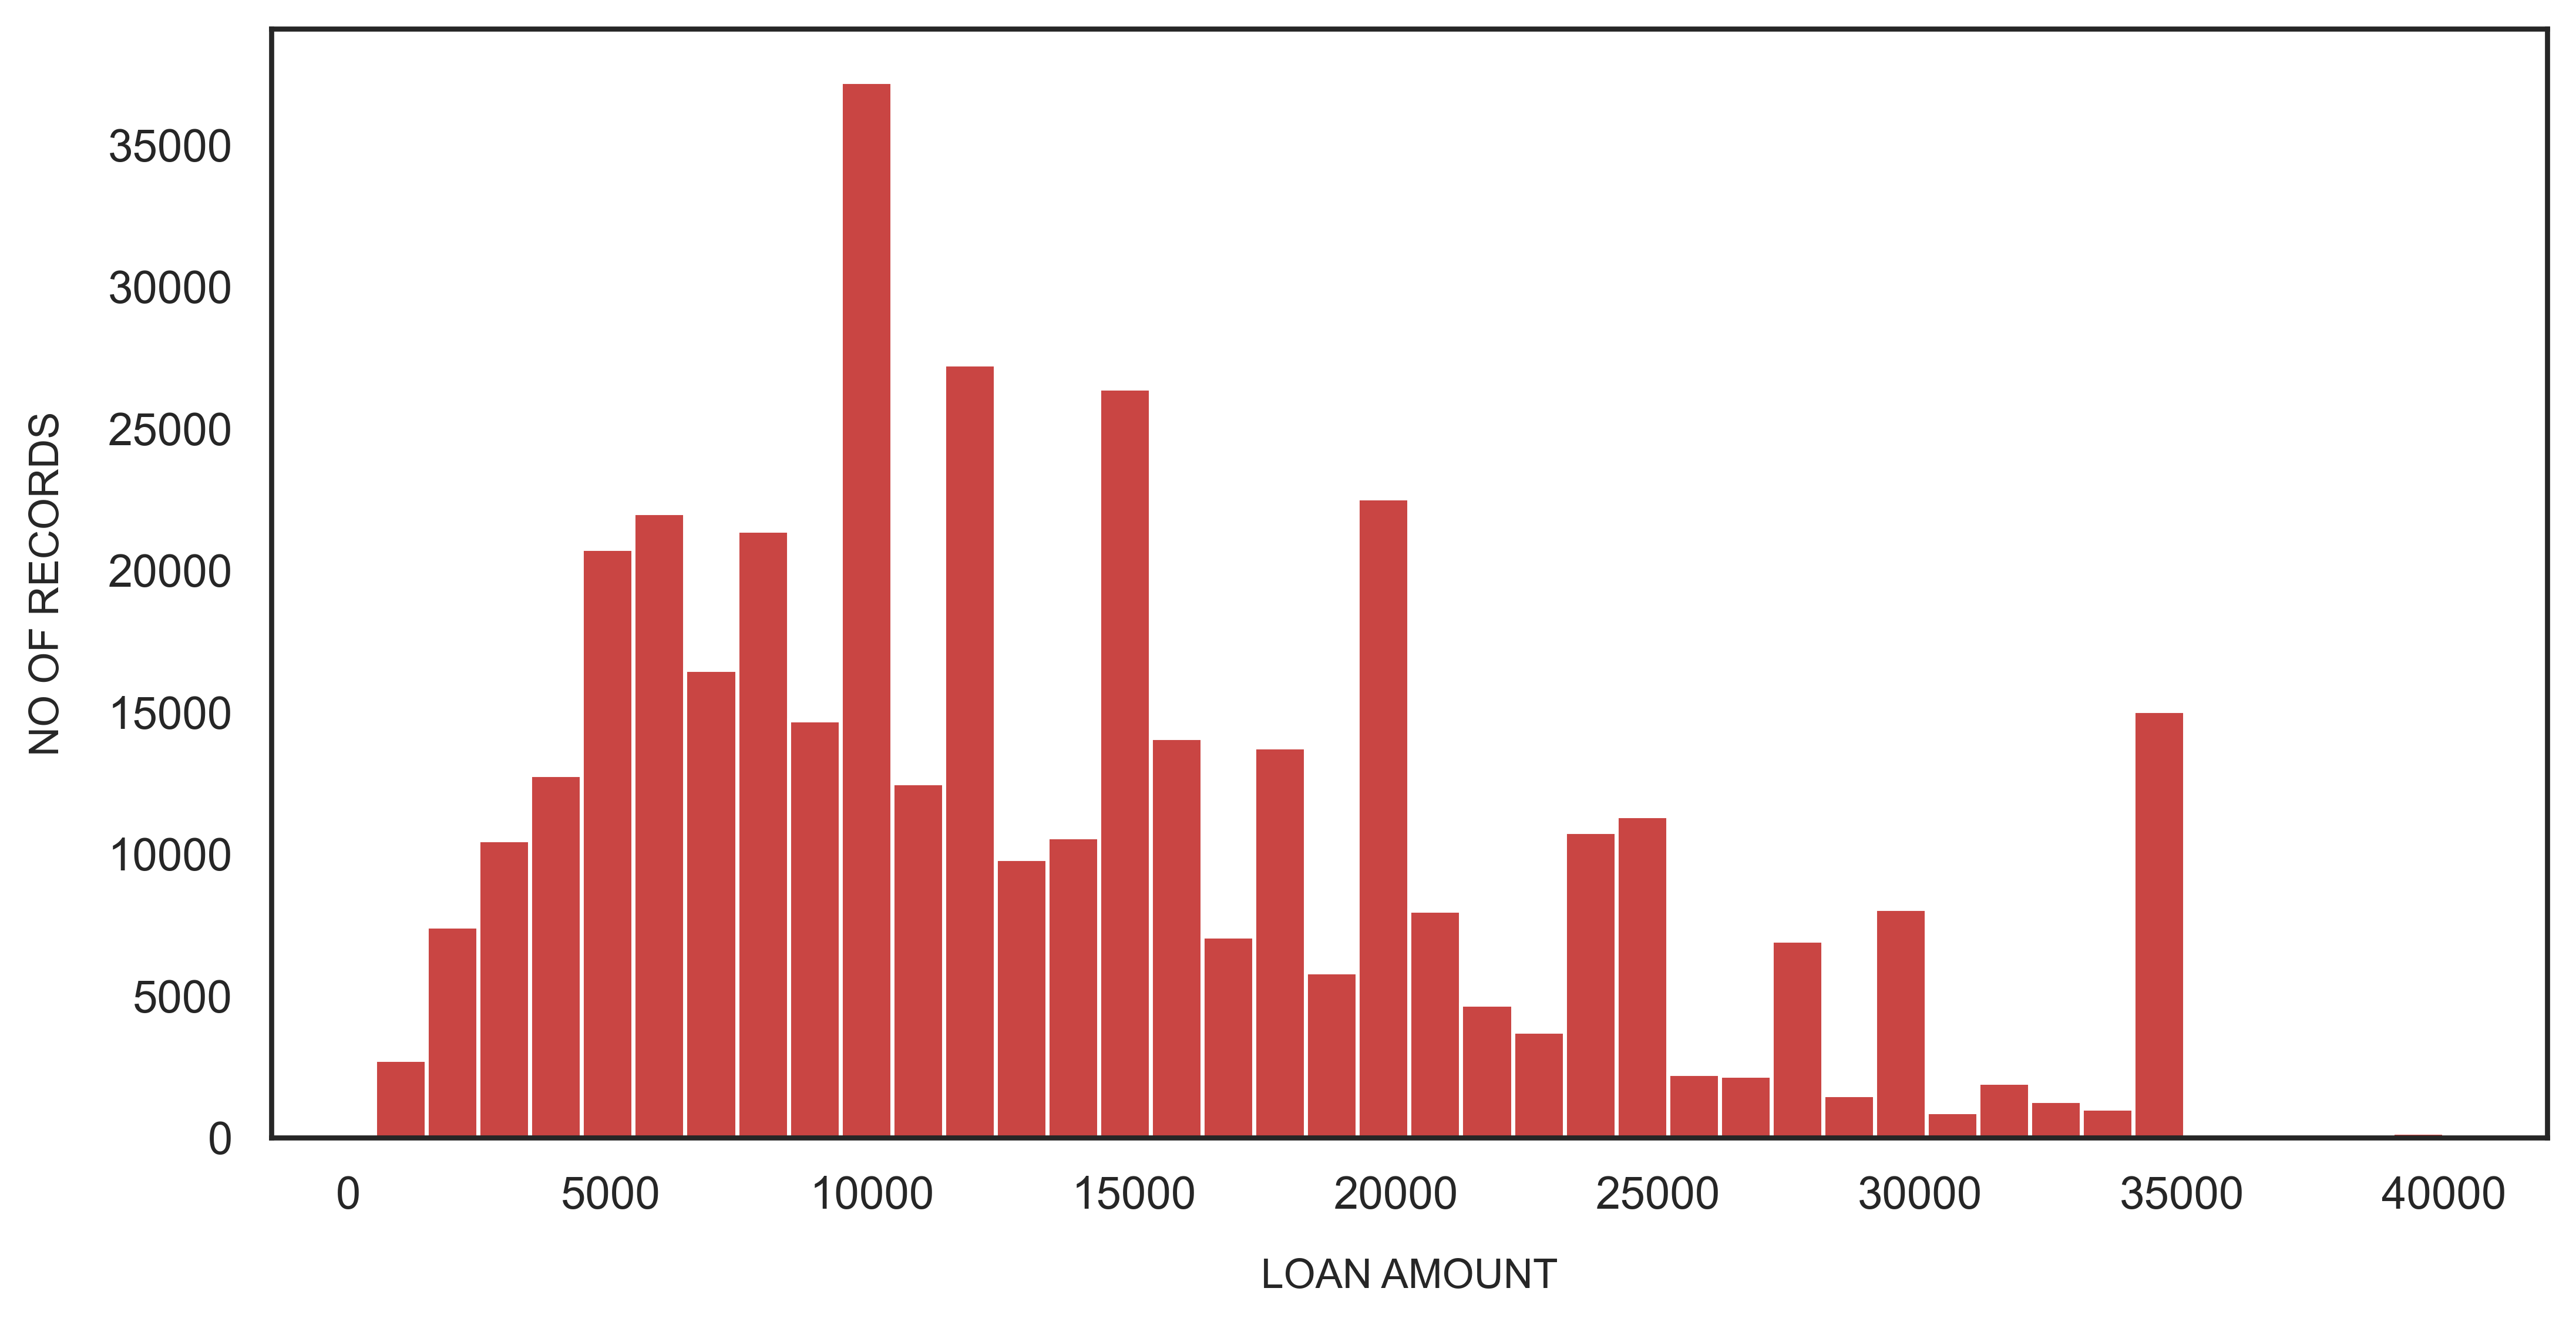

In [12]:
sns.set_theme(style='white',palette="OrRd_r")
plt.figure(figsize=(10,5) , dpi = 500 )
sns.histplot(raw_data["loan_amnt"],bins=40)
plt.xlabel("LOAN AMOUNT",fontsize = 10,labelpad = 10)
plt.ylabel("NO OF RECORDS",fontsize = 10, labelpad = 10)



**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [13]:
# CODE HERE

In [14]:
raw_data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

In [15]:
# CODE HERE

<AxesSubplot:>

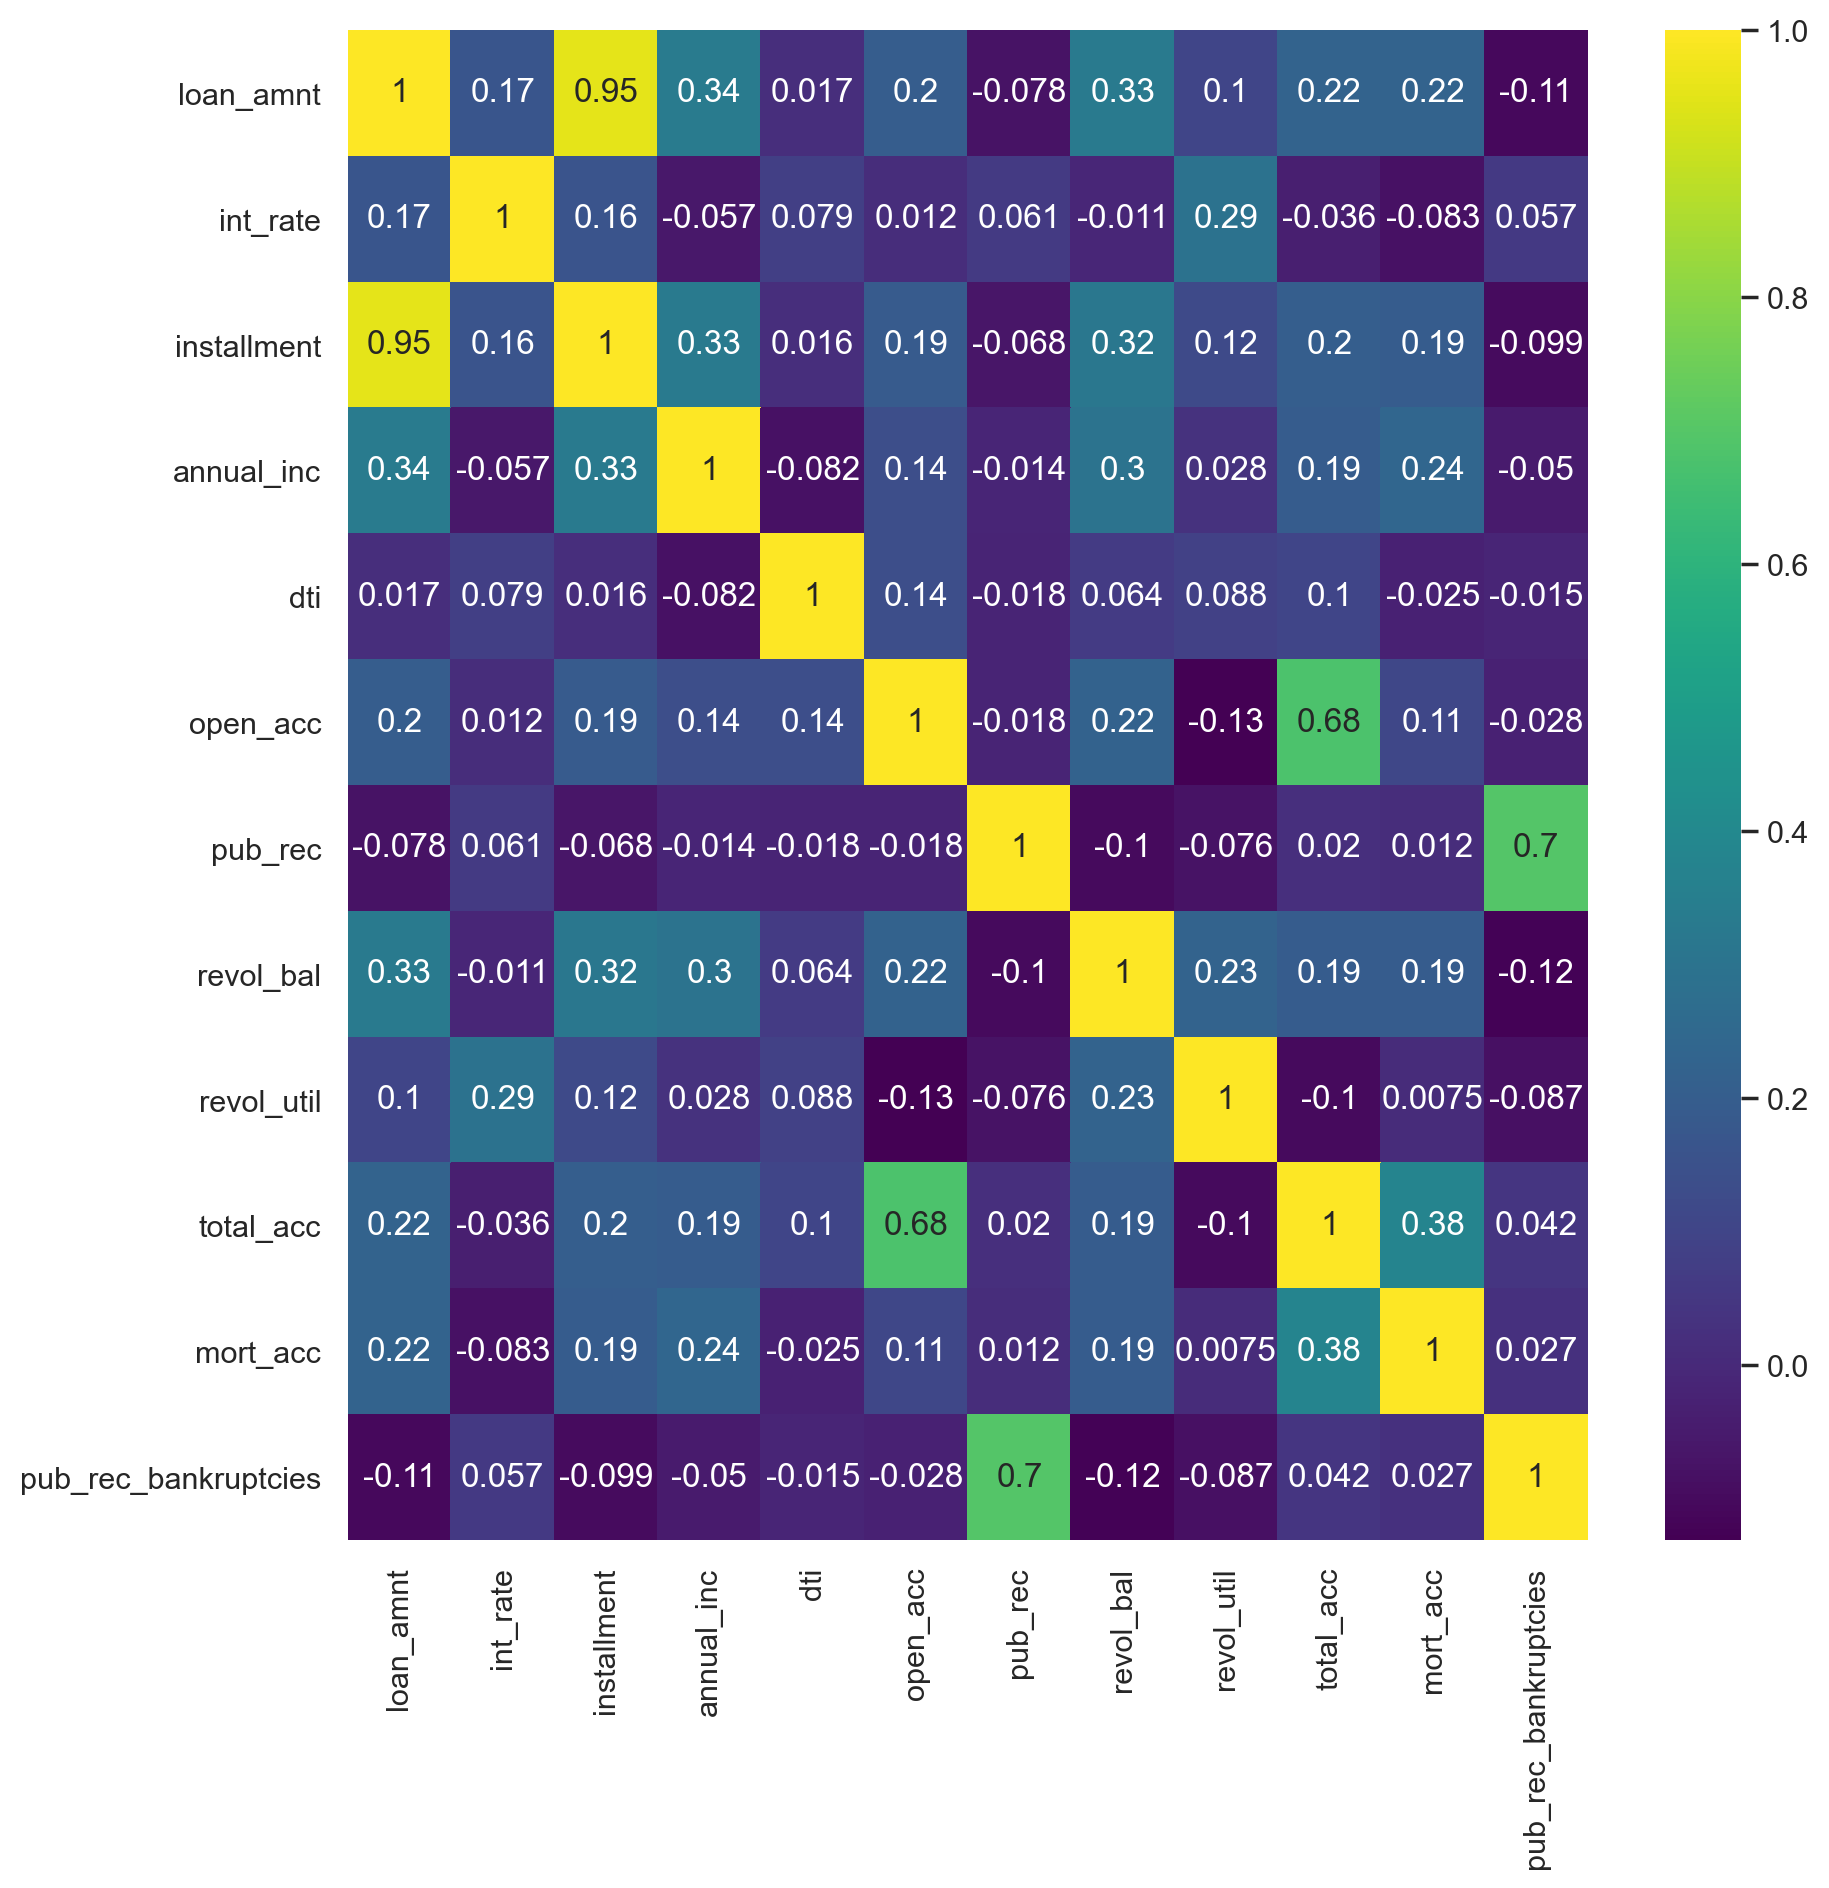

In [16]:
plt.figure(figsize = (10,10) , dpi = 200)
sns.heatmap(raw_data.corr() , annot = True , cmap='viridis')

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

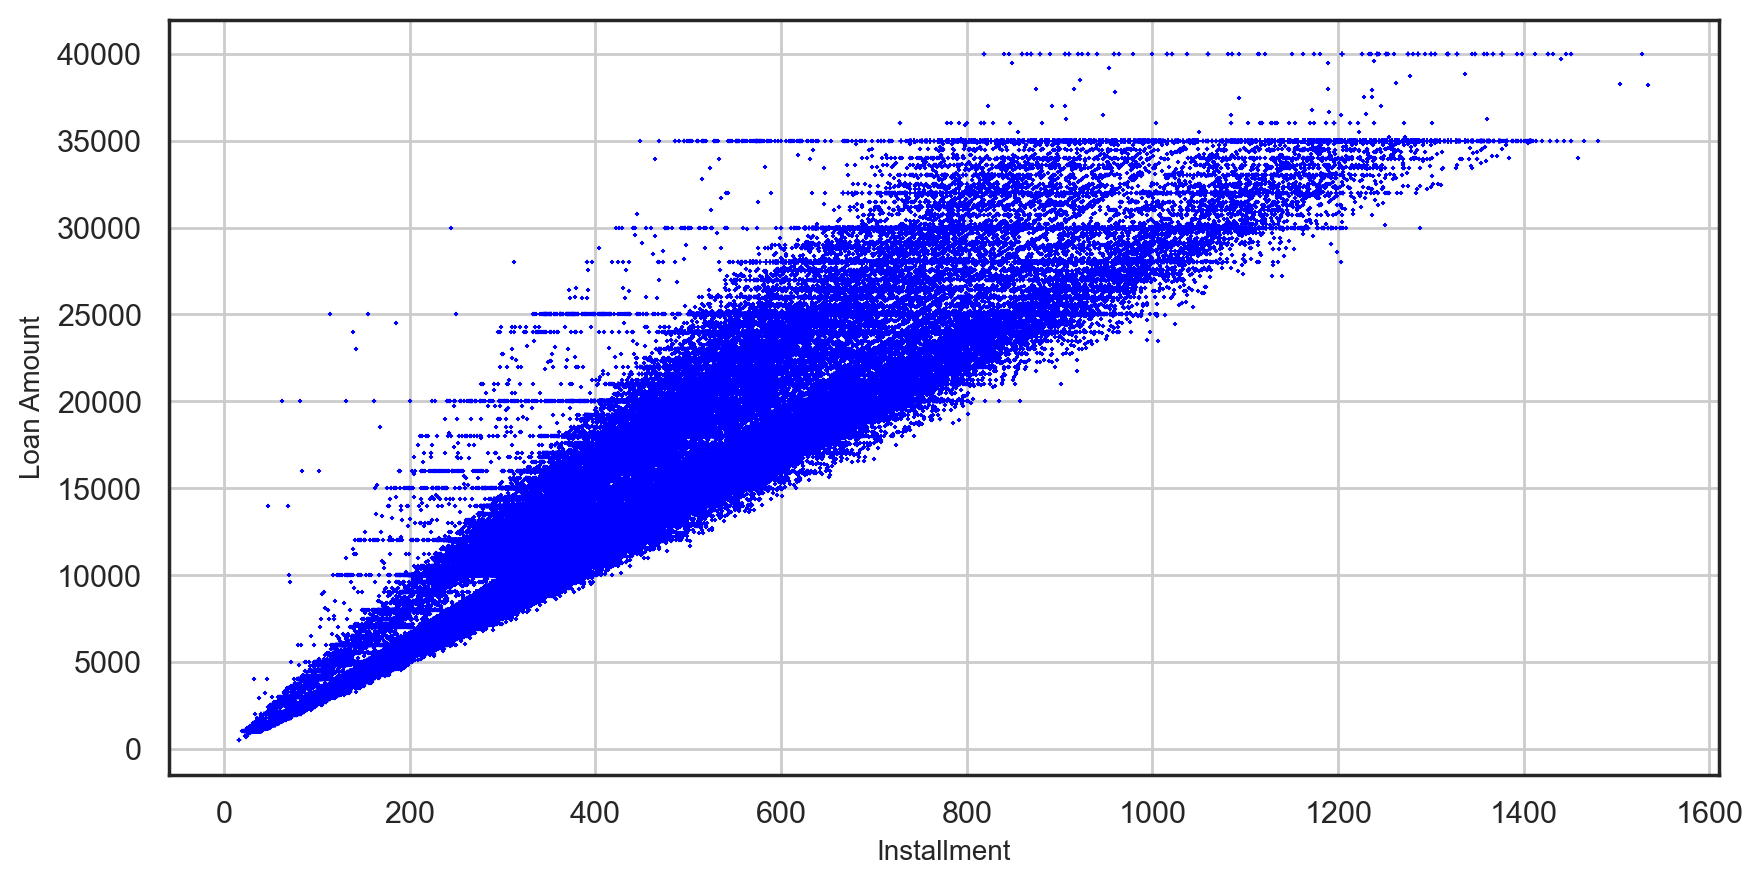

In [17]:
# CODE HERE
plt.figure(figsize = (10,5) , dpi = 200)
plt.scatter(x = "installment" , y = "loan_amnt" , data = raw_data , marker= "+" , s =0.5 , c = "blue")
plt.xlabel("Installment" , fontsize = 10)
plt.ylabel("Loan Amount" , fontsize = 10 )
plt.grid()

#Higher Amount of loan than installment must be higher

The monthly payment owed by the borrower if the loan originates.


The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

In [18]:
# CODE HERE

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

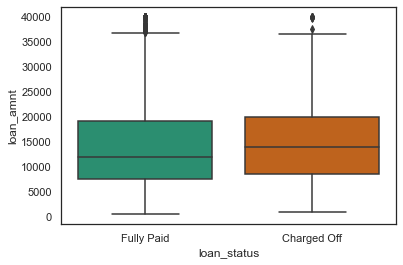

In [19]:

sns.boxplot(x = "loan_status" , y = "loan_amnt" , data = raw_data , palette="Dark2")

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [20]:
# CODE HERE
raw_data.groupby("loan_status")["loan_amnt"].describe()

#Higher amount of loan might not paid frequntly

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [21]:
# CODE HERE

In [22]:
raw_data["grade"].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [23]:
raw_data["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

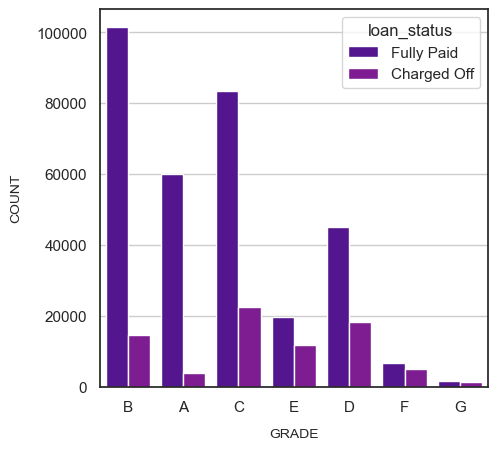

In [24]:
# CODE HERE
sns.set_theme(palette="plasma" , style = "white")
plt.figure(figsize = (5,5) , dpi = 100)
sns.countplot( x = "grade" , hue = "loan_status" , data = raw_data)
plt.xlabel("GRADE", fontsize = 10 , labelpad= 10)
plt.ylabel("COUNT" , fontsize = 10 , labelpad= 10)
plt.grid(axis='y')

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

In [25]:
#CODE HERE

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

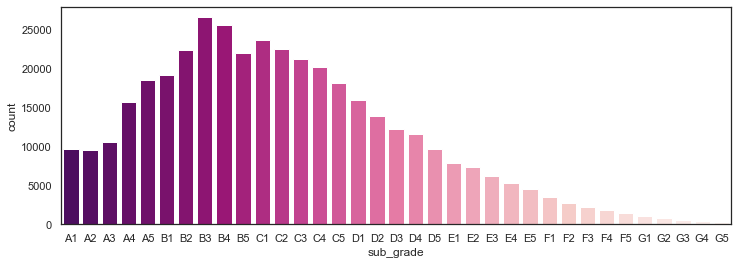

In [26]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(raw_data['sub_grade'].unique())
sns.countplot(x='sub_grade',data=raw_data,order = subgrade_order,palette='RdPu_r' )

In [27]:
# CODE HERE

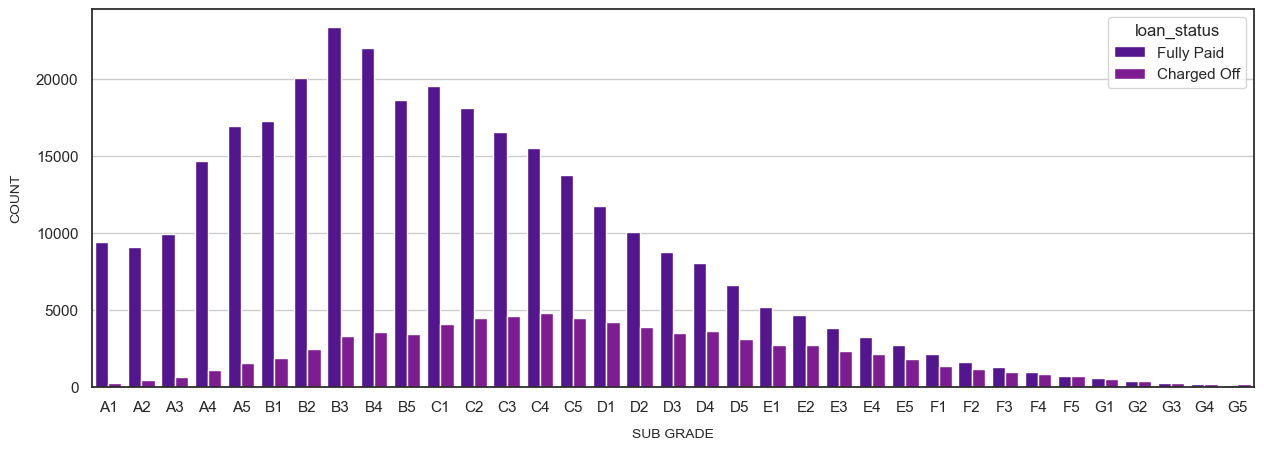

In [28]:
# CODE HERE
sns.set_theme(palette="plasma" , style = "white")
plt.figure(figsize = (15,5) , dpi = 100)
subgrade_order = sorted(raw_data['sub_grade'].unique())
sns.countplot( x = "sub_grade" , hue = "loan_status" , data = raw_data , order = subgrade_order)
plt.xlabel("SUB GRADE", fontsize = 10 , labelpad= 10 , )
plt.ylabel("COUNT" , fontsize = 10 , labelpad= 10)
plt.grid(axis='y')

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [29]:
# CODE HERE

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

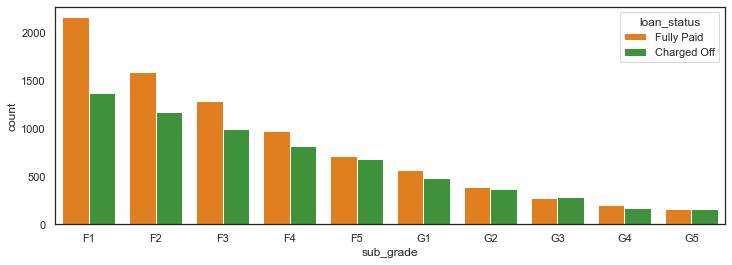

In [30]:
f_and_g = raw_data[(raw_data['grade']=='G') | (raw_data['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status',palette="Paired_r")

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [31]:
# CODE HERE

In [32]:
map_disc = {j : i for i,j in enumerate(list(raw_data["loan_status"].unique()))}

In [33]:
raw_data["loan_repaid"] = raw_data["loan_status"].map(map_disc)

In [34]:
raw_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",1


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [35]:
#CODE HERE

<AxesSubplot:>

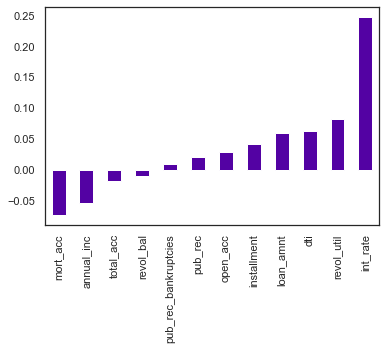

In [36]:
raw_data.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [37]:
update_raw = raw_data.copy()

# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [38]:
# CODE HERE

In [39]:
len(update_raw)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [40]:
# CODE HERE

In [41]:
update_raw.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [42]:
# CODE HERE

In [43]:
100* update_raw.isnull().sum()/len(update_raw)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them.**

In [44]:
# CODE HERE

**TASK: How many unique employment job titles are there?**

In [45]:
# CODE HERE

In [46]:
len(raw_data["emp_title"].unique())

173106

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [47]:
# CODE HERE

In [48]:
update_data = update_raw.drop('emp_title',axis=1)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [49]:
# CODE HERE

In [50]:
sorted(update_data['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [51]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

In [52]:
# CODE HERE

<AxesSubplot:xlabel='emp_length', ylabel='count'>

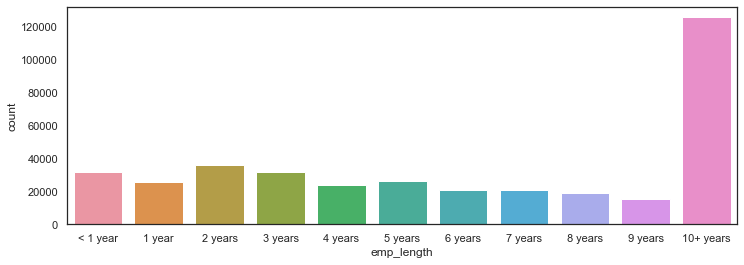

In [53]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=update_data,order=emp_length_order)

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [54]:
# CODE HERE

<AxesSubplot:xlabel='emp_length', ylabel='count'>

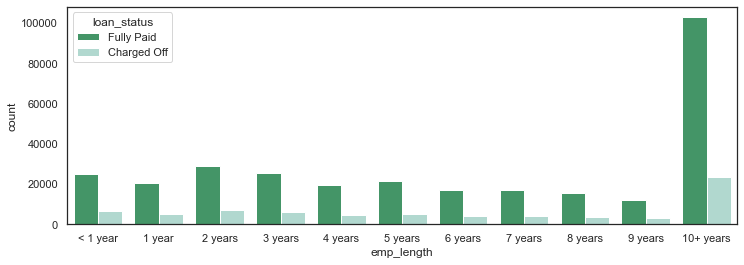

In [55]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=update_data,order=emp_length_order,hue='loan_status',palette="BuGn_r")

In [56]:
co_emplen = update_data[update_data["loan_status"] == "Charged Off"].groupby("emp_length").count()["loan_status"]

In [57]:
fp_emplen = update_data[update_data["loan_status"] == "Fully Paid"].groupby("emp_length").count()["loan_status"]

In [58]:
emp_len = co_emplen / fp_emplen

In [59]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [60]:
# CODE HERE

<AxesSubplot:xlabel='emp_length'>

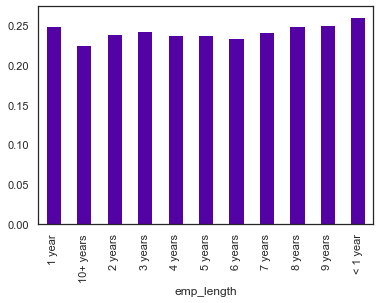

In [61]:
emp_len.plot(kind='bar')

In [62]:
new_update = update_data.drop('emp_length',axis=1)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [63]:
new_update.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [64]:
# CODE HERE

In [65]:
new_update['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [66]:
# CODE HERE

In [67]:
update_new = new_update.drop("title" , axis = 1)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---

**TASK: Create a value_counts of the mort_acc column.**

In [68]:
# CODE HERE

In [69]:
update_new['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [70]:
update_new.corr()["mort_acc"]

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid            -0.073111
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [85]:
update_new.groupby("total_acc").mean()["mort_acc"]


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [72]:
# CODE HERE

In [73]:
update_new.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [124]:
key = [i for i in update_new.groupby('total_acc').mean()['mort_acc'].index]
values = [i for i in update_new.groupby('total_acc').mean()['mort_acc']]

In [128]:

dictionary = {}
for i,z in zip(key,values) :
    dictionary[i] = z


In [129]:
dictionary

{2.0: 0.0,
 3.0: 0.05202312138728324,
 4.0: 0.0667433831990794,
 5.0: 0.10328947368421053,
 6.0: 0.15129310344827587,
 7.0: 0.22169531713100177,
 8.0: 0.30842176563558366,
 9.0: 0.36549925484351714,
 10.0: 0.4291584233754375,
 11.0: 0.5265700483091788,
 12.0: 0.6180337405468296,
 13.0: 0.7221235238791932,
 14.0: 0.8034818530539982,
 15.0: 0.9401418178469473,
 16.0: 1.0074047954866008,
 17.0: 1.1512688671421463,
 18.0: 1.235884973673552,
 19.0: 1.3580128970623357,
 20.0: 1.4093803385618886,
 21.0: 1.5199317512021095,
 22.0: 1.6407356109572175,
 23.0: 1.7217944688874922,
 24.0: 1.8458673428956336,
 25.0: 1.9005057623745958,
 26.0: 1.9874138957394336,
 27.0: 2.1035730039700042,
 28.0: 2.1630495269894268,
 29.0: 2.2310434531265053,
 30.0: 2.3313858138581387,
 31.0: 2.3901044529961517,
 32.0: 2.4780095216504194,
 33.0: 2.5416821503778024,
 34.0: 2.589579158316633,
 35.0: 2.6506270049577134,
 36.0: 2.78726035868893,
 37.0: 2.7606275303643724,
 38.0: 2.8594635436343028,
 39.0: 2.8505976095617

In [132]:
update_new["mort_acc_ud"] = np.where(np.isnan(update_new["mort_acc"]),update_new["total_acc"].map(dictionary),update_new["mort_acc"])

In [133]:
np.isnan(update_new["mort_acc"])

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029     True
Name: mort_acc, Length: 396030, dtype: bool

In [134]:
update_new[["mort_acc","mort_acc_ud","total_acc"]]

,mort_acc,mort_acc_ud,total_acc
0,0.0,0.000000,25.0
1,3.0,3.000000,27.0
2,0.0,0.000000,26.0
3,0.0,0.000000,13.0
4,1.0,1.000000,43.0
...,...,...,...
396025,0.0,0.000000,23.0
396026,1.0,1.000000,8.0
396027,0.0,0.000000,23.0
396028,5.0,5.000000,20.0


In [135]:
update_new.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
mort_acc_ud                 0
dtype: int64

In [136]:
final_raw = update_new.drop("mort_acc",axis = 1)

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [ ]:
# CODE HERE

In [137]:
final_data = final_raw.dropna()

In [139]:
final_data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
mort_acc_ud             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [ ]:
# CODE HERE

In [141]:
final_data.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [ ]:
# CODE HERE

In [142]:
final_data['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [143]:
final_data['term'] = final_data['term'].apply(lambda term: int(term[:3]))

<ipython-input-143-3aa19a724275>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['term'] = final_data['term'].apply(lambda term: int(term[:3]))


### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [ ]:
# CODE HERE

In [146]:
final_data = final_data.drop('grade',axis=1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [ ]:
# CODE HERE

In [150]:
subgrade_dummies = pd.get_dummies(final_data["sub_grade"],drop_first=True)

In [169]:
subgrade_dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
final_data = pd.concat([final_data.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [152]:
final_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies', 'address', 'loan_repaid',
       'mort_acc_ud', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [153]:
final_data.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [ ]:
# CODE HERE

In [154]:
dummies = pd.get_dummies(final_data[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
final_data = final_data.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
final_data = pd.concat([final_data,dummies],axis=1)

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [ ]:
#CODE HERE

In [156]:
final_data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [ ]:
#CODE HERE

In [172]:
#Replace is more suitable when used more than one argumrnts with many others
final_data['home_ownership'] = final_data["home_ownership"].replace(['NONE',"ANY"] , "OTHER")

In [175]:
dummy = pd.get_dummies(final_data['home_ownership'] , drop_first=True)

In [176]:
dummy

,OTHER,OWN,RENT
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0
...,...,...,...
396025,0,0,1
396026,0,0,0
396027,0,0,1
396028,0,0,0


In [178]:
final_data = pd.concat([final_data.drop('home_ownership',axis=1),dummy],axis=1)

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [ ]:
#CODE HERE

In [179]:
final_data['zip_code'] = final_data['address'].apply(lambda address:address[-5:])

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [180]:
dummies = pd.get_dummies(final_data['zip_code'],drop_first=True)
final_data = final_data.drop(['zip_code','address'],axis=1)
final_data = pd.concat([final_data,dummies],axis=1)

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [ ]:
#CODE HERE

In [182]:
final_data = final_data.drop('issue_d',axis=1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [ ]:
#CODE HERE

In [184]:
final_data['earliest_cr_year'] = final_data['earliest_cr_line'].apply(lambda date:int(date[-4:]))
final_data = final_data.drop('earliest_cr_line',axis=1)

In [186]:
final_data.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [187]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [188]:
# CODE HERE

In [189]:
final_data = final_data.drop('loan_status',axis=1)

**TASK: Set X and y variables to the .values of the features and label.**

In [190]:
#CODE HERE

In [191]:
X = final_data.drop('loan_repaid',axis=1).values
y = final_data['loan_repaid'].values

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [ ]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [ ]:
#CODE HERE

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [ ]:
# CODE HERE

In [193]:
from sklearn.preprocessing import MinMaxScaler

In [194]:
scaler = MinMaxScaler()

In [195]:
X_train = scaler.fit_transform(X_train)

In [196]:
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [197]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [198]:
# CODE HERE
model = Sequential()


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [ ]:
# CODE HERE

In [199]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.3020 - val_loss: 0.2651
Epoch 2/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2658 - val_loss: 0.2635
Epoch 3/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2633 - val_loss: 0.2622
Epoch 4/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2618 - val_loss: 0.2619
Epoch 5/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2608 - val_loss: 0.2619
Epoch 6/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2604 - val_loss: 0.2614
Epoch 7/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2600 - val_loss: 0.2627
Epoch 8/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2596 - val_loss: 0.2617
Epoch 9/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2593 - val_loss: 0.2612
Epoch 10/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.259

**TASK: OPTIONAL: Save your model.**

In [200]:
# CODE HERE

In [201]:
from tensorflow.keras.models import load_model

In [202]:
model.save('full_data_project_model.h5')  

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [203]:
# CODE HERE

In [204]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

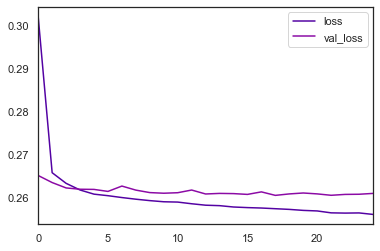

In [205]:
losses[['loss','val_loss']].plot()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [206]:
# CODE HERE

In [207]:
from sklearn.metrics import classification_report,confusion_matrix

In [210]:
predictions = model.predict(X_test)

In [217]:
predictions = ( predictions > 0.5 )
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [218]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     63386
           1       0.99      0.44      0.61     15658

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [225]:
confusion_matrix(y_test,predictions)

array([[63301,    85],
       [ 8826,  6832]], dtype=int64)

In [227]:
import random
random.seed(101)
random_ind = random.randint(0,len(final_data))

new_customer = final_data.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

**TASK: Given the customer below, would you offer this person a loan?**

In [228]:
# CODE HERE

In [230]:
model.predict(new_customer.values.reshape(1,78))

array([[0.]], dtype=float32)

**TASK: Now check, did this person actually end up paying back their loan?**

In [231]:
# CODE HERE

In [233]:
final_data.iloc[random_ind]['loan_repaid']

0.0

# GREAT JOB!